## geomImshow()

`geomImshow()` displays an image specified by 1D, 2D or 3D array, however native data expected by the `geomImshow` is a flat `IntArray` with pixels in `RGB`/`ARGB` color model. 

Whether the image is grayscale or color depends on the shape of the image array:
- (M, N) - grey-scale image
- (M, N, 3) - color RGB image
- (M, N, 4) - color RGB image with alpha channel



In [1]:
%useLatestDescriptors
%use lets-plot
@file:DependsOn("com.github.jai-imageio:jai-imageio-core:1.3.0")

### Reading image from a PNG file using `BufferedImage`

The easiest way to get pixel data is to call `BufferedImage.getRgb()` method as it returns pixels in `ARGB` color model, stored in `IntArray`.

In [9]:
import javax.imageio.ImageIO
import java.net.URL
import org.jetbrains.letsPlot.geom.Extensions.create

val url = URL("https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png")
val img = ImageIO.read(url)
val fisherBoat = RasterData.create(img)
fisherBoat

ImageData(225 x 225 x 3)


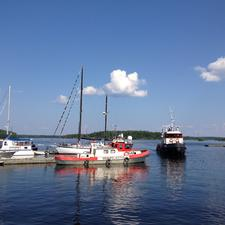

In [10]:
letsPlot() + geomImshow(fisherBoat)